<h1> Week 10 Homework

<h2>Question 14.1 </h2>

The breast cancer data set breast-cancer-wisconsin.data.txt from
http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/ (description at
http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29 ) has missing values.
1. Use the mean/mode imputation method to impute values for the missing data.
2. Use regression to impute values for the missing data.
3. Use regression with perturbation to impute values for the missing data.
4. (Optional) Compare the results and quality of classification models (e.g., SVM, KNN) build using <br>
(1) the data sets from questions 1,2,3; <br>
(2) the data that remains after data points with missing values are removed; and (3) the data set when a binary variable is introduced to indicate missing values. 


<h2>Answer 14.1 </h2>

DataSet Description <br>
Number of Instances: 699 (as of 15 July 1992) <br>
Number of Attributes: 10 plus the class attribute <br>
There are 16 instances in Groups 1 to 6 that contain a single missing (i.e., unavailable) attribute value, now denoted by "?".


| # | Attribute | Domain |
| --- | --- | --- |
| 1 | Sample code number | id number |
| 2 | Clump Thickness | 1 - 10 |
| 3 | Uniformity of Cell Size | 1 - 10 |
| 4 | Uniformity of Cell Shape | 1 - 10 |
| 5 | Marginal Adhesion | 1 - 10 |
| 6 | Single Epithelial Cell Size | 1 - 10 |
| 7 | Bare Nuclei | 1 - 10 |
| 8 | Bland Chromatin | 1 - 10 |
| 9 | Normal Nucleoli | 1 - 10 |
| 10 | Mitoses | 1 - 10 |
| 11 | Class | (2 for benign, 4 for malignant) |

<p><p style="page-break-after:always;"></p></p>

In [1]:
# loading the dataset
# READ DATASET as DataFrame
# Note defining NA as ? based on Dataset Description
df <- read.table("breast-cancer-wisconsin.data", header = FALSE, sep = ",", na.string = "?")
# Display Data
head(df)
cat("No. of cols:", ncol(df), "\n")
cat("No. of rows:", nrow(df), "\n")
cat("No. of Missing Values:", sum(is.na(df)), "\n")

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,10,9,7,1,4


No. of cols: 11 
No. of rows: 699 
No. of Missing Values: 16 


In [2]:
# Drop ID columns (V1)
df$V1 <- NULL

All Data is loaded succesfully as per Dataset description.

<p><p style="page-break-after:always;"></p></p>

In [3]:
# Summary of the Dataframe Columns
summary(df)
cat("Missing Values %", round(sum(is.na(df))/nrow(df)*100,2))

       V2               V3               V4               V5        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median : 1.000   Median : 1.000   Median : 1.000  
 Mean   : 4.418   Mean   : 3.134   Mean   : 3.207   Mean   : 2.807  
 3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
                                                                    
       V6               V7               V8               V9        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 2.000   Median : 1.000   Median : 3.000   Median : 1.000  
 Mean   : 3.216   Mean   : 3.545   Mean   : 3.438   Mean   : 2.867  
 3rd Qu.: 4.000   3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000  

Missing Values % 2.29

Note: Column V7 "Bare Nuclei" has all missing 16 values. <br>
Only 2.3% of the data has missing values

<p><p style="page-break-after:always;"></p></p>

<h4> 1. Use the mean/mode imputation method to impute values for the missing data. </h4>
Using the Mean

In [4]:
# Copying the dataframe
df_mean <- df
# Finding Mean V7 removing missing values
mean_V7 <- mean(df$V7, na.rm=TRUE)
cat("Mean Value of V7", round(mean_V7,3))
# Replacing The missing value with the mean
df_mean$V7[is.na(df_mean$V7)] <- mean_V7
# Summary of the Dataframe Column V7
summary(df_mean)
cat("No. of Missing Values:", sum(is.na(df_mean)))

Mean Value of V7 3.545

       V2               V3               V4               V5        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median : 1.000   Median : 1.000   Median : 1.000  
 Mean   : 4.418   Mean   : 3.134   Mean   : 3.207   Mean   : 2.807  
 3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
       V6               V7               V8               V9        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 2.000   Median : 1.000   Median : 3.000   Median : 1.000  
 Mean   : 3.216   Mean   : 3.545   Mean   : 3.438   Mean   : 2.867  
 3rd Qu.: 4.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
      V10              V11      
 

No. of Missing Values: 0

Note all missing values have been removed

<p><p style="page-break-after:always;"></p></p>

Using the Mode

In [5]:
# Copying the dataframe
df_mode <- df
# Define Mode Function
Mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}
# Finding Mean V7 removing missing values
mode_V7 <- Mode(df$V7)
cat("Mode Value of V7", mode_V7)
# Replacing The missing value with the mean
df_mode$V7[is.na(df_mode$V7)] <- mode_V7
# Summary of the Dataframe Column V7
summary(df_mode)
cat("No. of Missing Values:", sum(is.na(df_mode)))

Mode Value of V7 1

       V2               V3               V4               V5        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median : 1.000   Median : 1.000   Median : 1.000  
 Mean   : 4.418   Mean   : 3.134   Mean   : 3.207   Mean   : 2.807  
 3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
       V6               V7               V8               V9        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 2.000   Median : 1.000   Median : 3.000   Median : 1.000  
 Mean   : 3.216   Mean   : 3.486   Mean   : 3.438   Mean   : 2.867  
 3rd Qu.: 4.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
      V10              V11      
 

No. of Missing Values: 0

<p><p style="page-break-after:always;"></p></p>

<h4> 2. Use regression to impute values for the missing data. </h4>

Using Package MICE (Multivariate Imputation by Chained Equations) to estimate V7 missing values. <br>
https://www.rdocumentation.org/packages/mice/versions/3.14.0/topics/mice

method = norm.predict (Imputes the "best value" according to the linear regression model) <br>
https://rdrr.io/cran/mice/man/mice.impute.norm.predict.html

Useful Reference <br>
https://stefvanbuuren.name/fimd/sec-linearnormal.html

In [19]:
options(warn=-1)
# install.packages("mice")
library(mice)

In [7]:
set.seed(0)
# imputing missing values
imp <- mice(df, method="norm.predict", printFlag=FALSE)
# Store the results
df_reg <- complete(imp)
# Summary of results
head(df_reg)
cat("No. of cols:", ncol(df_reg), "\n")
cat("No. of rows:", nrow(df_reg), "\n")
cat("No. of Missing Values:", sum(is.na(df_reg)))

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2
5,4,1,1,3,2,1,3,1,1,2
6,8,10,10,8,7,10,9,7,1,4


No. of cols: 10 
No. of rows: 699 
No. of Missing Values: 0

<p><p style="page-break-after:always;"></p></p>

<h4> 3. Use regression with perturbation to impute values for the missing data. </h4>

Using Package MICE again but changing method from norm.predict to norm.nob <br>

method = norm.nob (This function creates imputations using the spread around the fitted linear regression line) <br>
https://rdrr.io/cran/mice/man/mice.impute.norm.nob.html

In [8]:
set.seed(0)
# imputing missing values with perturbation
imp_pert <- mice(df, method="norm.nob", printFlag=FALSE)
# Store the results
df_reg_pert <- complete(imp_pert)
# Summary of results
head(df_reg_pert)
cat("No. of cols:", ncol(df_reg_pert), "\n")
cat("No. of rows:", nrow(df_reg_pert), "\n")
cat("No. of Missing Values:", sum(is.na(df_reg_pert)))

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2
5,4,1,1,3,2,1,3,1,1,2
6,8,10,10,8,7,10,9,7,1,4


No. of cols: 10 
No. of rows: 699 
No. of Missing Values: 0

<p><p style="page-break-after:always;"></p></p>

Comparing the results for missing values of V7 using both regression only and using regression with perturbation.

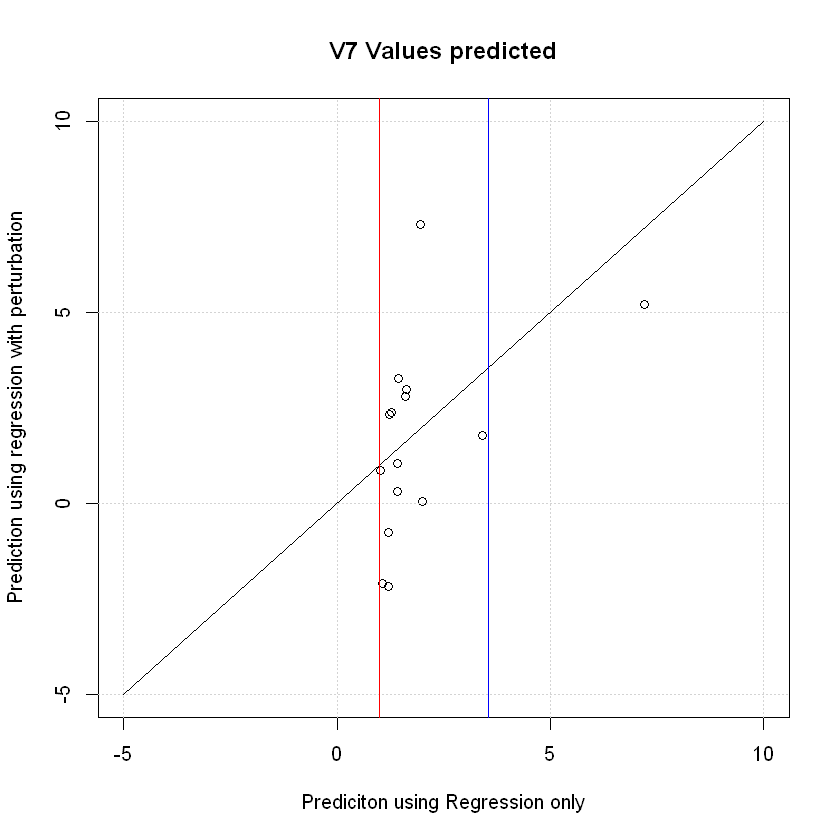

In [9]:
# Storing the IDs (V1) of missing values
id_missing_values <- rownames(df[is.na(df$V7),])
# Predicted values for Imputation regression model
df_reg_predict <- df_reg[id_missing_values, "V7"]
# Predicted values for Imputation regression model with perturbation
df_reg_pert_predict <- df_reg_pert[id_missing_values, "V7"]
# plot Results
plot(df_reg_predict, df_reg_pert_predict, xlim=c(-5,10), ylim=c(-5,10), 
     xlab="Prediciton using Regression only", 
     ylab="Prediction using regression with perturbation")
title("V7 Values predicted")
grid()
# plot 45 Degree line
lines(c(-5,10),c(-5,10))
# Plot Mode
lines(c(1,1), c(-100,100), col='red')
# Plot Mean
lines(c(3.545,3.545), c(-100,100), col='blue')

Note that 
1. The vast majority of the points predicted by the regression only model lies between the mode (1, red) and the mean (3.5, blue)
2. Normal regression imputation limited the prediction to between 1 and 10 (variable V7 limits), but regression with perturbation ended up with values < 1 (outside variable range). This is due to the random sampling of the error in perturbations as shown below 

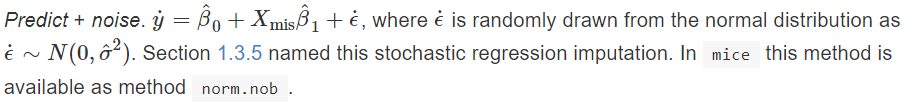

<p><p style="page-break-after:always;"></p></p>

<h4> 4. (Optional) Compare the results and quality of classification models (e.g., SVM, KNN) build using </h4> <br>
(1) the data sets from questions 1,2,3; <br>
(2) the data that remains after data points with missing values are removed; and <br>
(3) the data set when a binary variable is introduced to indicate missing values. 

<b> Solution </b> <br>

Create the dataframe that remains after data points with missing values are removed (Clean dataset)

In [10]:
# Create Clean dataset (Remove NA data points)
df_clean <- na.omit(df)
head(df_clean)
cat("No. of cols:", ncol(df_clean), "\n")
cat("No. of rows:", nrow(df_clean), "\n")
cat("No. of Missing Values:", sum(is.na(df_clean)))

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,5,1,1,1,2,1,3,1,1,2
2,5,4,4,5,7,10,3,2,1,2
3,3,1,1,1,2,2,3,1,1,2
4,6,8,8,1,3,4,3,7,1,2
5,4,1,1,3,2,1,3,1,1,2
6,8,10,10,8,7,10,9,7,1,4


No. of cols: 10 
No. of rows: 683 
No. of Missing Values: 0

<p><p style="page-break-after:always;"></p></p>

Create the data set when a binary variable is introduced to indicate missing values (df_Missing_cat)

In [11]:
# Copy Dataframe
df_missing_cat <- df
# Add Missing Category 
df_missing_cat$V12 <- 1
df_missing_cat$V12[is.na(df_missing_cat$V7)] <- 0
# Replace Missing Values in V7 by 0
df_missing_cat$V7[is.na(df_missing_cat$V7)] <- 0
summary(df_missing_cat)

       V2               V3               V4               V5        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 1.000   1st Qu.: 1.000  
 Median : 4.000   Median : 1.000   Median : 1.000   Median : 1.000  
 Mean   : 4.418   Mean   : 3.134   Mean   : 3.207   Mean   : 2.807  
 3rd Qu.: 6.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
       V6               V7               V8               V9        
 Min.   : 1.000   Min.   : 0.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 2.000   1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 1.000  
 Median : 2.000   Median : 1.000   Median : 3.000   Median : 1.000  
 Mean   : 3.216   Mean   : 3.464   Mean   : 3.438   Mean   : 2.867  
 3rd Qu.: 4.000   3rd Qu.: 5.000   3rd Qu.: 5.000   3rd Qu.: 4.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
      V10              V11        

<p><p style="page-break-after:always;"></p></p>

Step 1: Create a function to split a scale dataframe then split into train and test dataframes. Note, We did not Scale (V11) as it is a categorical variable

In [12]:
train_test_split <- function(df) {
    # Scale the Dataframe for all columns except target column
    scaled_df <- as.data.frame(scale(df[,1:9], center=TRUE, scale=TRUE))
    # add Category column
    scaled_df$V11 <- df$V11
    # Account for missing column Category
    if ("V12" %in% colnames(df)){
        scaled_df$V12 <- df$V12
    }
    # Split the data
    train <- sample(1:nrow(scaled_df), 0.7*nrow(scaled_df))
    train_df <- scaled_df[train,]
    test_df <- scaled_df[-train,]
    return (list("train" = train_df, "test" = test_df))
}

Step 2: Split all dataframes into train and test dataframes (70%, 30%)

In [13]:
# Preparing mean imputation dataframe for training and test
df_mean_train_test <- train_test_split(df_mean)
# Preparing mode imputation dataframe for training and test
df_mode_train_test <- train_test_split(df_mode)
# Preparing regression imputation dataframe for training and test
df_reg_train_test <- train_test_split(df_reg)
# Preparing regression with perturbation imputation dataframe for training and test
df_reg_pert_train_test <- train_test_split(df_reg_pert)
# Preparing Clean dataframe for training and test
df_clean_train_test <- train_test_split(df_clean)
# Preparing the dataframe where missing data are indicated by category for training and test
df_missing_cat_train_test <- train_test_split(df_missing_cat)

Quality Checking the splits

In [14]:
table(df_mean_train_test$train$V11)
cat("Ratio of 2 to 4 responses in train dataset:", 
    round(table(df_mean_train_test$train$V11)[1]/nrow(df_mean_train_test$train),3), "\n")
table(df_mean_train_test$test$V11)
cat("Ratio of 2 to 4 responses in test dataset:", 
    round(table(df_mean_train_test$test$V11)[1]/nrow(df_mean_train_test$test),3), "\n")


  2   4 
317 172 

Ratio of 2 to 4 responses in train dataset: 0.648 



  2   4 
141  69 

Ratio of 2 to 4 responses in test dataset: 0.671 


Train test split Appears accurate

<p><p style="page-break-after:always;"></p></p>

The following section shows a sample of the calculation methodology for the mean imputation dataframe

In [18]:
# install.packages("class")
library(class)
library(caret)

In [16]:
cat("Sample Calculation methodology for mean ")
# Build KNN Model
knn_model <- knn(df_mean_train_test$train[,1:9], 
                 df_mean_train_test$test[,1:9], 
                 cl=df_mean_train_test$train$V11, 
                 k=1)
# Calculate Model Accuracy
model_confusion_matrix <- confusionMatrix(knn_model, as.factor(df_mean_train_test$test$V11))
model_confusion_matrix
# Model Accuracy
model_accuracy <- model_confusion_matrix$overall["Accuracy"]
round(model_accuracy*100,2)

Sample Calculation methodology for mean 

Confusion Matrix and Statistics

          Reference
Prediction   2   4
         2 137   5
         4   4  64
                                          
               Accuracy : 0.9571          
                 95% CI : (0.9202, 0.9802)
    No Information Rate : 0.6714          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9025          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9716          
            Specificity : 0.9275          
         Pos Pred Value : 0.9648          
         Neg Pred Value : 0.9412          
             Prevalence : 0.6714          
         Detection Rate : 0.6524          
   Detection Prevalence : 0.6762          
      Balanced Accuracy : 0.9496          
                                          
       'Positive' Class : 2               
                              

Accuracy 
   95.71

<p><p style="page-break-after:always;"></p></p>

Analyzing All possible techqniues KNN model performance

In [17]:
# list of all models
all_dataframes <- list(df_mean_train_test, df_mode_train_test, 
                       df_reg_train_test, df_reg_pert_train_test,
                       df_clean_train_test, df_missing_cat_train_test)
# vector to store results
accuracy_result_vector <- seq(1,6)
# loop across all models
for (i in seq(1,6)){
    dataset <- all_dataframes[[i]]
    # if to account for the extra column
    if ("V12" %in% colnames(dataset)){
        knn_model <- knn(dataset$train[,c(seq(1:9),11)],
                         dataset$test[,c(seq(1:9),11)],
                         cl=dataset$train$V11,
                         k=1)
    } else{
        knn_model <- knn(dataset$train[,1:9],
                         dataset$test[,1:9],
                         cl=dataset$train$V11,
                         k=1)
    }
    # Calculate Model Accuracy
    model_confusion_matrix <- confusionMatrix(knn_model, as.factor(dataset$test$V11))
    # Model Accuracy
    model_accuracy <- model_confusion_matrix$overall["Accuracy"]
    accuracy_result_vector[i] <- round(model_accuracy*100,2)
}
# name results vector
names(accuracy_result_vector) <- c("mean_imputation", "mode_imputation", 
                                   "regression_imputation", 
                                   "regression_with_perturbation",
                                   "Missing_values_removed",
                                   "Indicate_missing_by_Category")
# Display Results
for (i in seq(1,6)){
    cat(names(accuracy_result_vector)[i], accuracy_result_vector[i],"\n")
}

mean_imputation 95.71 
mode_imputation 96.67 
regression_imputation 97.14 
regression_with_perturbation 95.71 
Missing_values_removed 95.61 
Indicate_missing_by_Category 95.71 


From the data above, all techniques resulted in similar model performance in terms of accuracy. The minor differences can be attributed to random effects in the test data sets.

<p><p style="page-break-after:always;"></p></p>

<h2>Question 15.1 </h2>

Describe a situation or problem from your job, everyday life, current events, etc., for which optimization would be appropriate. What data would you need?

In oil & gas industry, optimizing the schedule of maintenance rigs (Workover rigs) which are mainly responsible for replacing failed pumps in oil producing wells is critical for restoring lost production and minimizing cost required. The schedule of maintenance rigs looks similar to the table below: <br>

| Rig | Well | Start Date | Required days | Oil rate potential, Barrel/Day |
| --- | --- | --- | --- | --- |
| Rig-1 | Well-2 | 1-Apr-2022 | 7 | 100 |
| Rig-1 | Well-25 | 9-Apr-2022 | 10 | 500 |

\* note Required days do not include rig move days as it depends on distance between wells (in the table above, 2 days were assumed)

The situation gets complex when:
1. The Number of wells are in the thousands range which 
2. The wells are scattered over large distances 
4. Different rigs have different capabilities and limitations and 
3. as the number of rigs available increases. 

The objective is to optimize the schedule for each rig such that the schedule:
1. minimize the rigs move distances (thus minimizing cost and time lost in moving rather than doing jobs and restoring porudciton) and 
2. at the same time minimizing lost production due to pumps failure.

Required Data:
1. Well's location (X & Y or latitude and longitude) to calculate required rig move distance
2. Best estimate of required job days per well (may include a distribution to account for error)
3. Oil Production potential per well
4. Rig capabilities